Importing pandas ; Importing seaborn ; Importing matplotlib ; Importing price prediction by book value growth csv ; Importing average closing price csv

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_closing=pd.read_csv('../data/output/average-closing-price.csv')
df_prediction=pd.read_csv('../data/output/price-prediction-by-book-value-growth.csv')

Visualizing the closing price and prediction

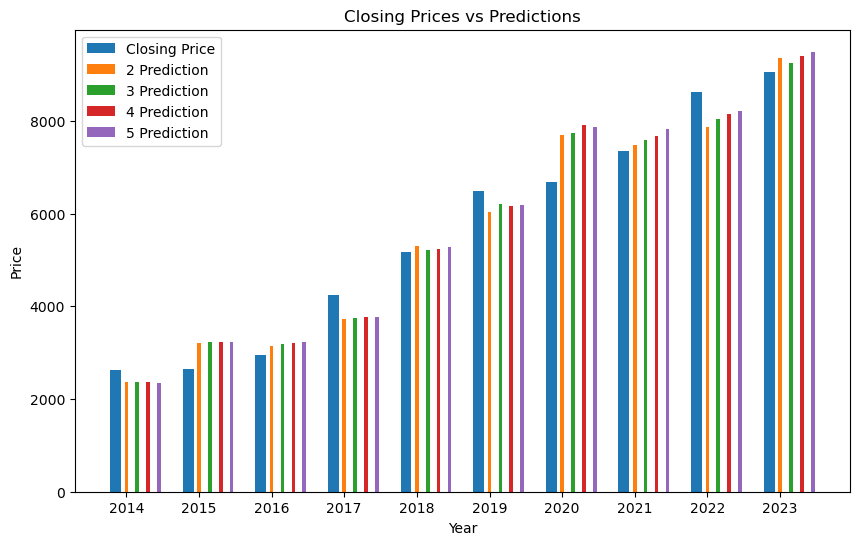

In [7]:
df_merged=pd.merge(df_closing,df_prediction,on='Year')
years=df_merged['Year']
bar_width=0.15
fig,ax=plt.subplots(figsize=(10,6))
for i,col in enumerate(df_merged.columns[1:]):
    ax.bar((df_merged.index)+i*bar_width,df_merged[col],label=col,width=bar_width if col=='Closing Price' else bar_width/3)
    
ax.set_xlabel('Year')
ax.set_ylabel('Price')
ax.set_title('Closing Prices vs Predictions')
ax.set_xticks(df_merged.index + bar_width)
ax.set_xticklabels(df_merged['Year'])
ax.legend()

plt.show()

Calculating the error of X Prediction columns and Average Closing Price

In [8]:
prediction_interval=range(2,6)
df_prediction=df_prediction.set_index('Year')
df_closing=df_closing.set_index('Year')
df_error=pd.DataFrame(index=df_prediction.index)

for i in prediction_interval:
    df_error[str(i)+' Error']=(df_prediction[str(i)+' Prediction']-df_closing['Closing Price'])/df_prediction[str(i)+' Prediction']
df_error=df_error.dropna()
print(df_error.head(len(df_error)))

       2 Error   3 Error   4 Error   5 Error
Year                                        
2014 -0.109994 -0.110476 -0.112349 -0.118428
2015  0.176387  0.178526  0.179190  0.178621
2016  0.062662  0.075396  0.081937  0.085455
2017 -0.135085 -0.131297 -0.125706 -0.122084
2018  0.024106  0.007047  0.012069  0.017663
2019 -0.073997 -0.045014 -0.054557 -0.048616
2020  0.133160  0.137288  0.155761  0.151209
2021  0.016589  0.031481  0.041476  0.062222
2022 -0.095444 -0.072849 -0.060126 -0.050242
2023  0.031928  0.021910  0.036272  0.045970


Visualizing error for outliers

<Axes: >

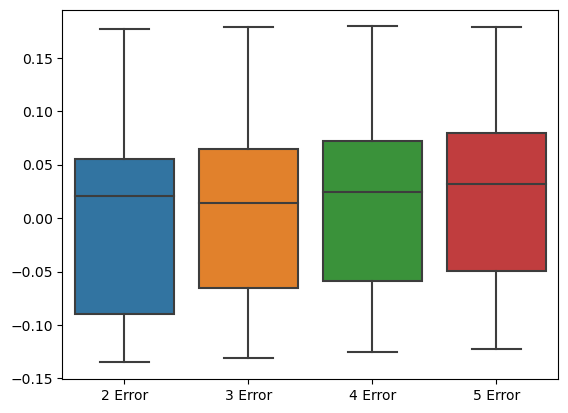

In [9]:
sns.boxplot(df_error)

Calculating the mean of X Error columns

In [10]:
print("Mean")
print(df_error.abs().mean())

Mean
2 Error    0.085935
3 Error    0.081128
4 Error    0.085944
5 Error    0.088051
dtype: float64
